1. Импортируем необходимые библиотеки

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#для отображения графиков прямо в ноутбуке
%matplotlib inline

#настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

2. Импортируем набор данных из файла employee.csv

In [5]:
df = pd.read_csv('employee.csv')
print("Данные успешно загружены!")

Данные успешно загружены!


3. Выведем первые 10 строк

In [6]:
print("Первые 10 строк данных:")
print(df.head(10))

Первые 10 строк данных:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  promotion_last_5years department  \
0                   3

4. Основная информация о датасете

In [7]:
print("Размер датасета:", df.shape)
print("\nИнформация о столбцах:")
print(df.info())
print("\nСтатистическое описание числовых признаков:")
print(df.describe())

Размер датасета: (14999, 10)

Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None

Статистическое описание числовых признаков:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.0000

5. Проверка на пропущенные значения

In [8]:
print("Пропущенные значения по столбцам:")
print(df.isnull().sum())
print(f"\nВсего пропущенных значений: {df.isnull().sum().sum()}")

Пропущенные значения по столбцам:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

Всего пропущенных значений: 0


6. Проверка на дубликаты

In [9]:
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Дубликаты удалены. Новый размер: {df.shape}")

Количество дубликатов: 3008
Дубликаты удалены. Новый размер: (11991, 10)


7. Анализ распределения целевой переменной

Распределение целевой переменной 'left' (уволился/не уволился):
left
0    10000
1     1991
Name: count, dtype: int64

Процент уволившихся: 16.60%


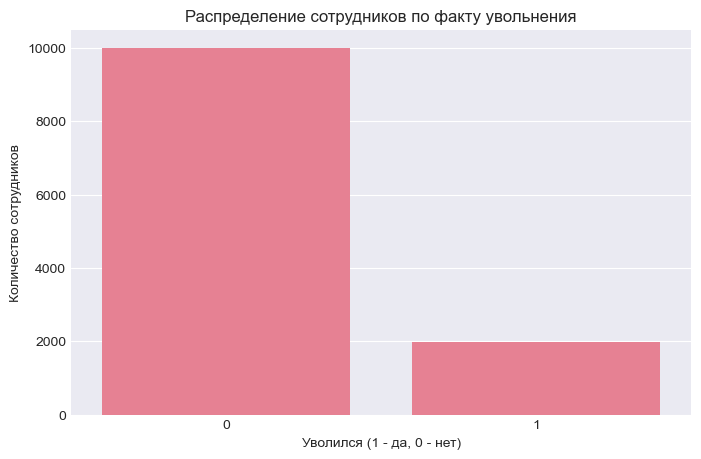

In [10]:
print("Распределение целевой переменной 'left' (уволился/не уволился):")
left_counts = df['left'].value_counts()
print(left_counts)
print(f"\nПроцент уволившихся: {left_counts[1] / len(df) * 100:.2f}%")

plt.figure(figsize=(8, 5))
sns.countplot(x='left', data=df)
plt.title('Распределение сотрудников по факту увольнения')
plt.xlabel('Уволился (1 - да, 0 - нет)')
plt.ylabel('Количество сотрудников')
plt.show()

8. Анализ категориальных признаков

Проверяем названия столбцов...
Все столбцы: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary', 'left']

Найдены столбцы: ['department', 'salary', 'Work_accident', 'promotion_last_5years']

Анализ категориальных признаков:


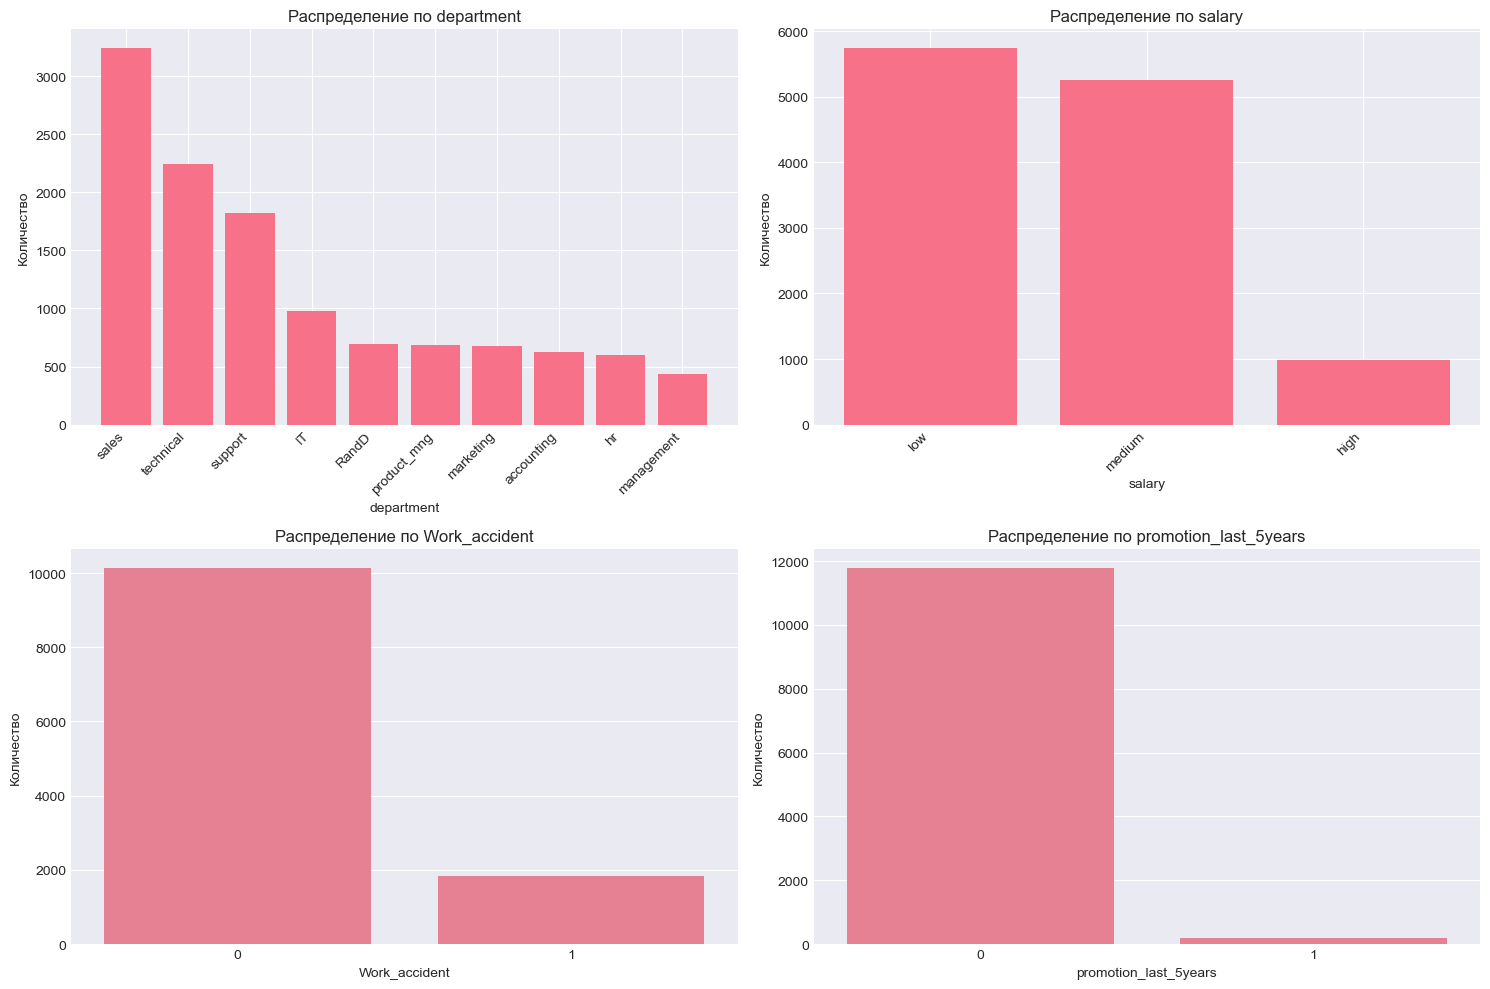

In [12]:
#сначала определим правильные названия столбцов
print("Проверяем названия столбцов...")
print("Все столбцы:", df.columns.tolist())

categorical_cols = ['department', 'salary', 'Work_accident', 'promotion_last_5years']

#проверяем, что все столбцы существуют
existing_cols = [col for col in categorical_cols if col in df.columns]
print(f"\nНайдены столбцы: {existing_cols}")

if len(existing_cols) != len(categorical_cols):
    print(f"Предупреждение: некоторые столбцы не найдены!")
    print(f"Ожидалось: {categorical_cols}")
    print(f"Найдено: {existing_cols}")
    categorical_cols = existing_cols

print("\nАнализ категориальных признаков:")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

#если столбцов меньше 4, уменьшаем количество графиков
if len(categorical_cols) < 4:
    fig, axes = plt.subplots(1, len(categorical_cols), figsize=(5*len(categorical_cols), 5))
    if len(categorical_cols) == 1:
        axes = [axes]
else:
    axes = axes[:len(categorical_cols)]

for idx, col in enumerate(categorical_cols):
    if idx >= len(axes):
        break
        
    if col in ['department', 'salary']:
        value_counts = df[col].value_counts()
        axes[idx].bar(range(len(value_counts)), value_counts.values)
        axes[idx].set_title(f'Распределение по {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Количество')
 
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    else:
        #для бинарных признаков
        sns.countplot(x=col, data=df, ax=axes[idx])
        axes[idx].set_title(f'Распределение по {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Количество')

plt.tight_layout()
plt.show()

9. Анализ связи категориальных признаков с увольнением

Влияние категориальных признаков на увольнение:


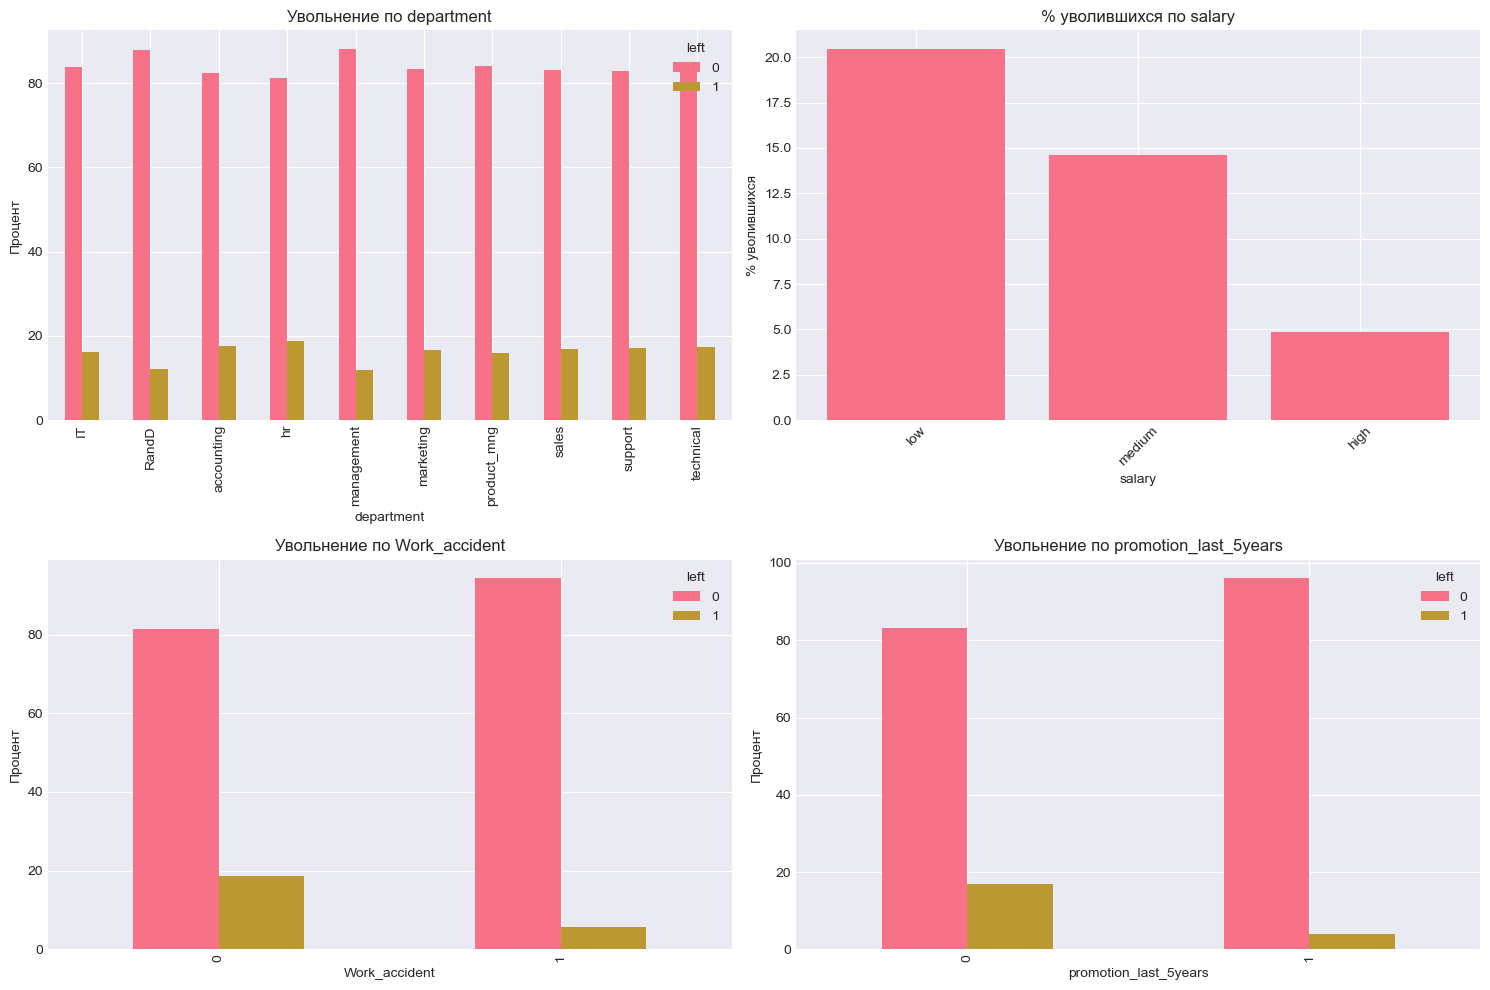

In [13]:
print("Влияние категориальных признаков на увольнение:")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    #считаем процент уволившихся по каждой категории
    if col in ['sales', 'salary']:
        pivot = df.groupby(col)['left'].mean().sort_values(ascending=False)
        axes[idx].bar(pivot.index, pivot.values * 100)
        axes[idx].set_title(f'% уволившихся по {col}')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].set_ylabel('% уволившихся')
    else:
        pivot = pd.crosstab(df[col], df['left'], normalize='index') * 100
        pivot.plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'Увольнение по {col}')
        axes[idx].set_ylabel('Процент')
    
    axes[idx].set_xlabel(col)

plt.tight_layout()
plt.show()

10. Анализ числовых признаков

Анализ числовых признаков:
Найден столбец: 'satisfaction_level' -> используем 'satisfaction_level'
Найден столбец: 'last_evaluation' -> используем 'last_evaluation'
Найден столбец: 'number_project' -> используем 'number_project'
Найден столбец: 'average_montly_hours' -> используем 'average_montly_hours'
Найден столбец: 'time_spend_company' -> используем 'time_spend_company'
Найден столбец: 'Work_accident' -> используем 'Work_accident'
Найден столбец: 'promotion_last_5years' -> используем 'promotion_last_5years'

Числовые столбцы для анализа: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


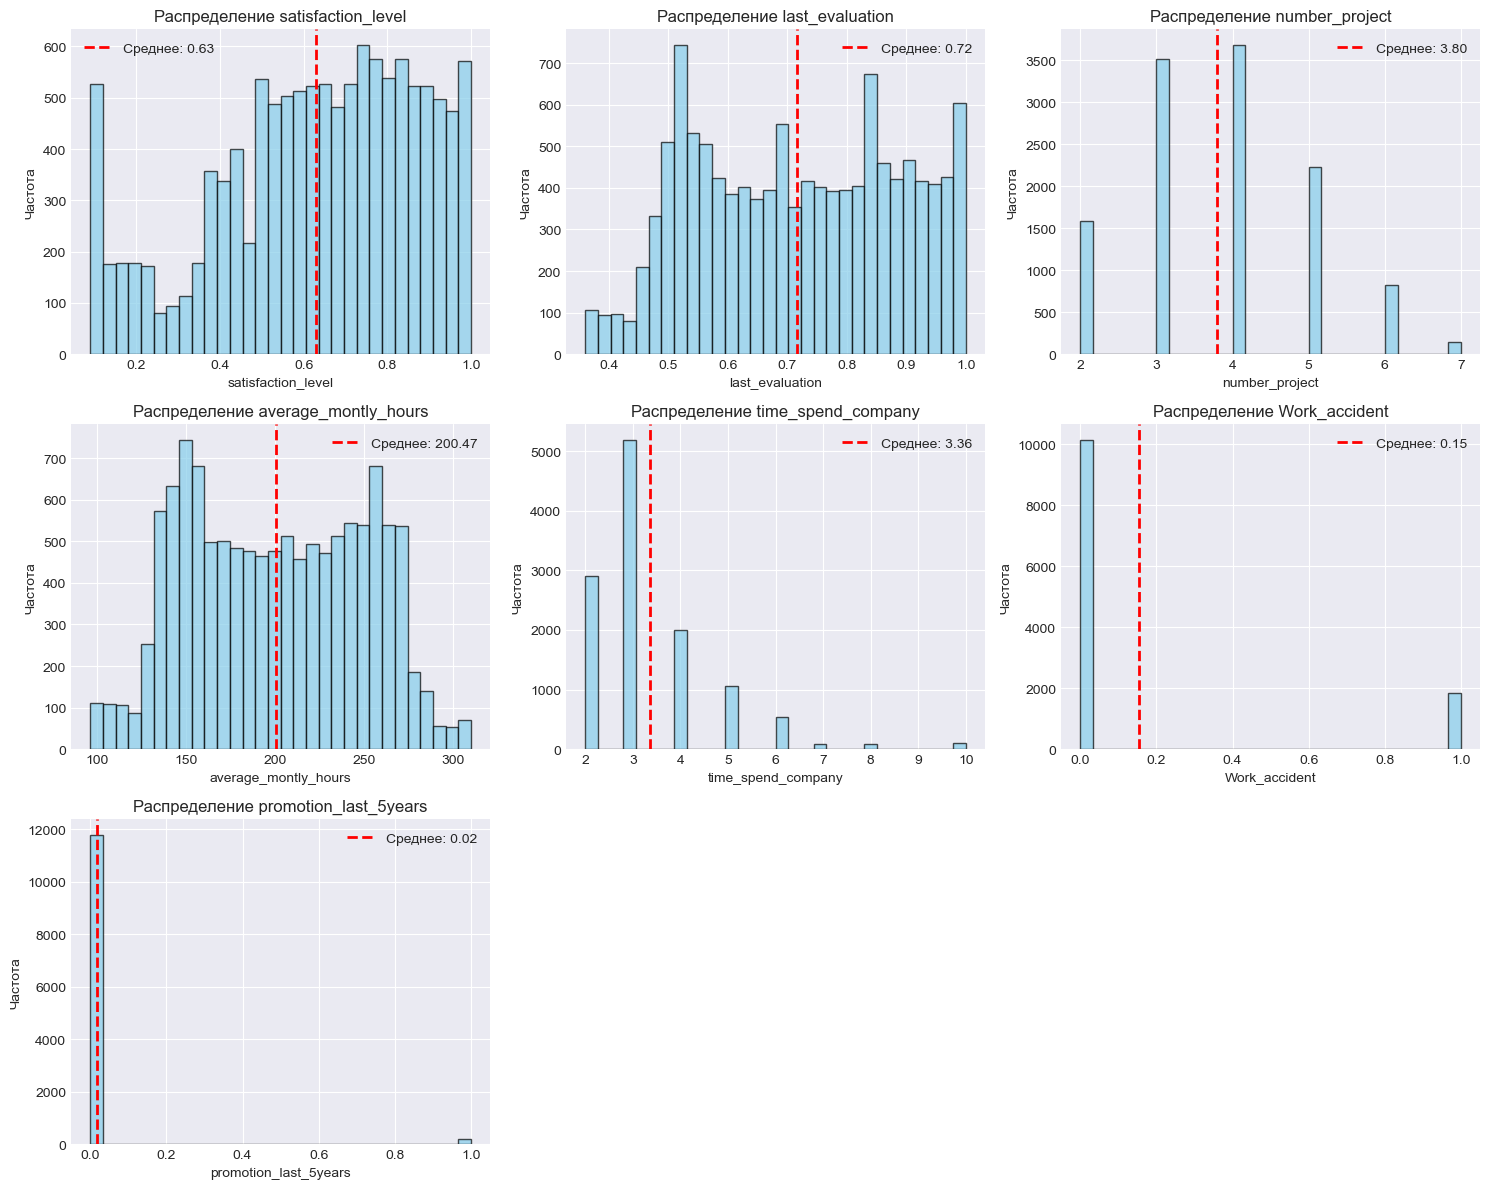


Статистика по числовым признакам:
       satisfaction_level  last_evaluation  number_project  \
count           11991.000        11991.000       11991.000   
mean                0.630            0.717           3.803   
std                 0.241            0.168           1.163   
min                 0.090            0.360           2.000   
25%                 0.480            0.570           3.000   
50%                 0.660            0.720           4.000   
75%                 0.820            0.860           5.000   
max                 1.000            1.000           7.000   

       average_montly_hours  time_spend_company  Work_accident  \
count             11991.000           11991.000      11991.000   
mean                200.474               3.365          0.154   
std                  48.728               1.330          0.361   
min                  96.000               2.000          0.000   
25%                 157.000               3.000          0.000   
50%       

In [16]:
print("Анализ числовых признаков:")
numerical_cols = []
# проверяем существование каждого столбца
possible_numerical_cols = {
    'satisfaction_level': 'satisfaction_level',
    'last_evaluation': 'last_evaluation', 
    'number_project': 'number_project',  
    'number_projects': 'number_project',  
    'average_montly_hours': 'average_montly_hours',
    'average_monthly_hours': 'average_montly_hours',  
    'time_spend_company': 'time_spend_company',
    'Work_accident': 'Work_accident',
    'promotion_last_5years': 'promotion_last_5years'
}

for possible_name, correct_name in possible_numerical_cols.items():
    if possible_name in df.columns:
        if correct_name not in numerical_cols:
            numerical_cols.append(correct_name)
        print(f"Найден столбец: '{possible_name}' -> используем '{correct_name}'")

print(f"\nЧисловые столбцы для анализа: {numerical_cols}")

n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
        axes[idx].set_title(f'Распределение {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Частота')
  
        mean_val = df[col].mean()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                         label=f'Среднее: {mean_val:.2f}')
        axes[idx].legend()

for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("\nСтатистика по числовым признакам:")
print(df[numerical_cols].describe().round(3))

11. Анализ связи числовых признаков с увольнением

Сравнение числовых признаков для уволившихся и неуволившихся:
Анализируем столбцы: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


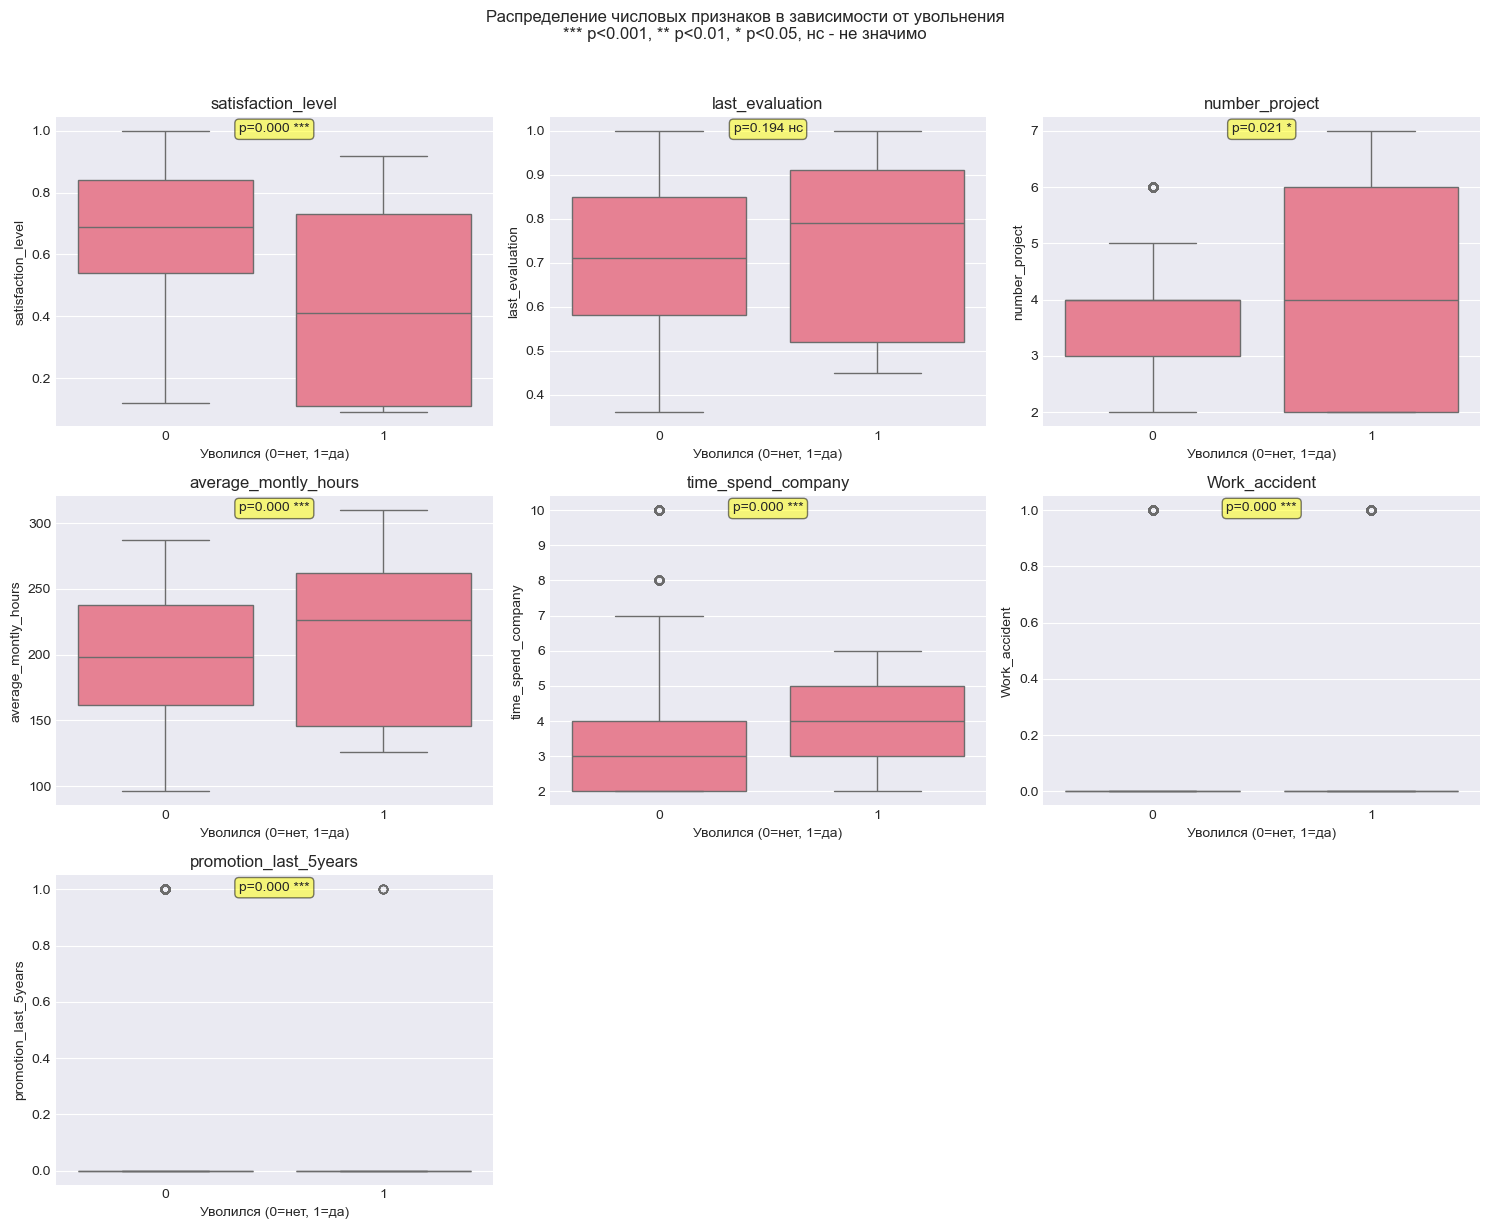


Ключевые различия между группами:
                 Признак  Среднее (остались)  Среднее (уволились)  Разница  \
6  promotion_last_5years               0.020                0.004   -0.015   
5          Work_accident               0.174                0.053   -0.122   
0     satisfaction_level               0.667                0.440   -0.227   
4     time_spend_company               3.262                3.881    0.619   
3   average_montly_hours             198.943              208.162    9.220   
2         number_project               3.787                3.883    0.097   
1        last_evaluation               0.716                0.722    0.006   

   Отн. разница (%)  
6           -79.394  
5           -69.778  
0           -34.028  
4            18.990  
3             4.634  
2             2.553  
1             0.855  


In [20]:
print("Сравнение числовых признаков для уволившихся и неуволившихся:")

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'left' in numeric_cols:
    numeric_cols.remove('left')

print(f"Анализируем столбцы: {numeric_cols}")

n = len(numeric_cols)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(x='left', y=col, data=df, ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel('Уволился (0=нет, 1=да)')
    
    from scipy import stats
    group_0 = df[df['left'] == 0][col]
    group_1 = df[df['left'] == 1][col]
    t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
    
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "нс"
    axes[idx].text(0.5, 0.95, f"p={p_value:.3f} {significance}", 
                   transform=axes[idx].transAxes, ha='center', 
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Распределение числовых признаков в зависимости от увольнения\n*** p<0.001, ** p<0.01, * p<0.05, нс - не значимо', 
             y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

print("\nКлючевые различия между группами:")
comparison_df = pd.DataFrame({
    'Признак': numeric_cols,
    'Среднее (остались)': [df[df['left']==0][col].mean() for col in numeric_cols],
    'Среднее (уволились)': [df[df['left']==1][col].mean() for col in numeric_cols],
    'Разница': [df[df['left']==1][col].mean() - df[df['left']==0][col].mean() for col in numeric_cols],
    'Отн. разница (%)': [(df[df['left']==1][col].mean() - df[df['left']==0][col].mean()) / 
                        df[df['left']==0][col].mean() * 100 if df[df['left']==0][col].mean() != 0 else 0 
                        for col in numeric_cols]
})

print(comparison_df.round(3).sort_values('Отн. разница (%)', key=abs, ascending=False))

12. Корреляционный анализ

Матрица корреляций (только числовые признаки):


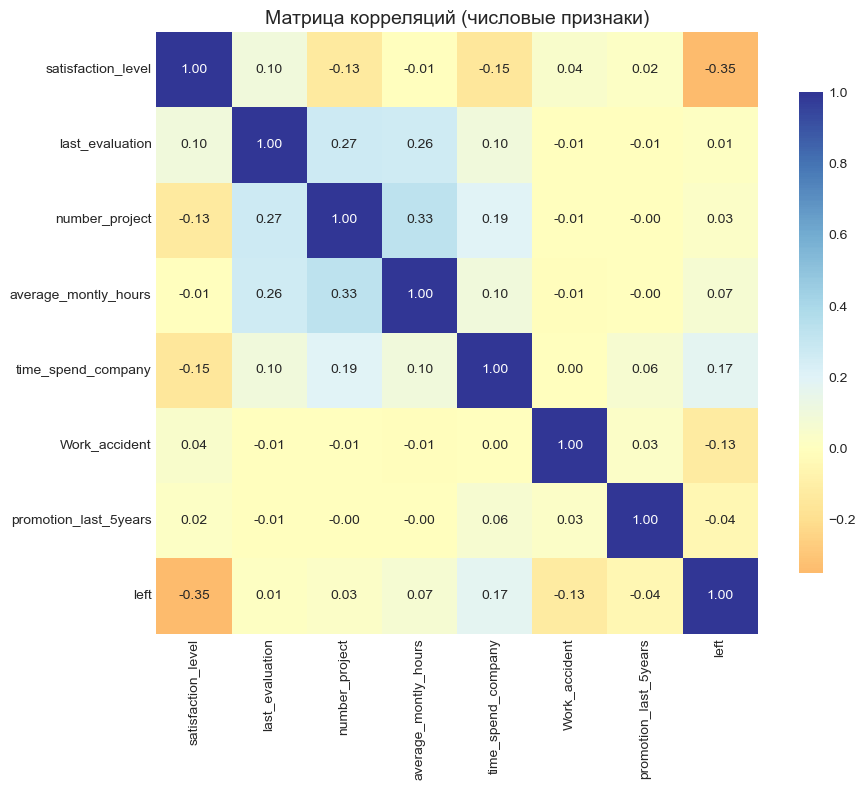


Корреляция с 'left' (увольнением):
left                     1.000
time_spend_company       0.173
average_montly_hours     0.070
number_project           0.031
last_evaluation          0.014
promotion_last_5years   -0.045
Work_accident           -0.125
satisfaction_level      -0.351
Name: left, dtype: float64


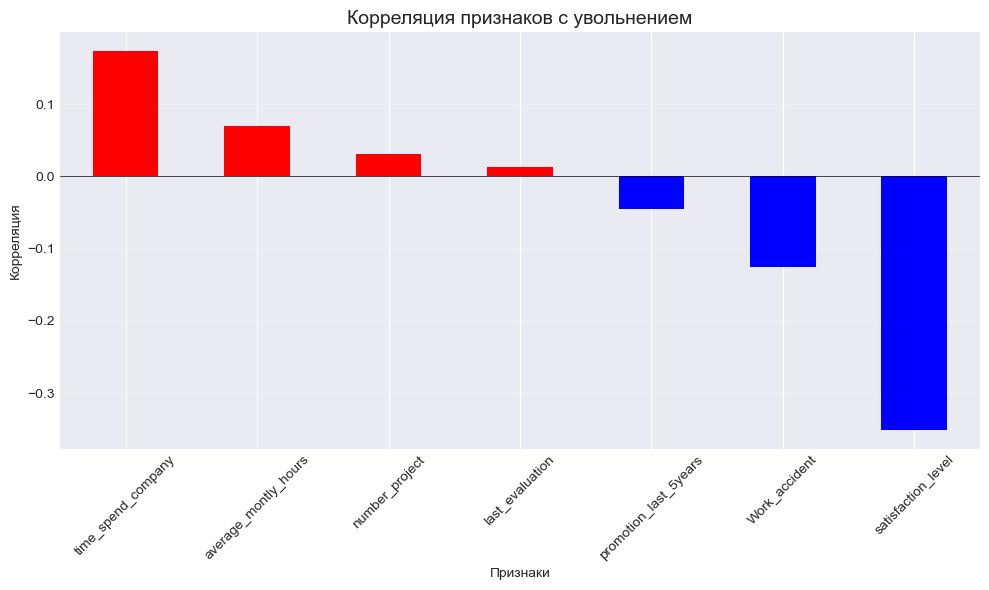

In [24]:
print("Матрица корреляций (только числовые признаки):")

numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', center=0, 
            fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Матрица корреляций (числовые признаки)', fontsize=14)
plt.tight_layout()
plt.show()

print("\nКорреляция с 'left' (увольнением):")
corr_with_left = correlation_matrix['left'].sort_values(ascending=False)
print(corr_with_left.round(3))

plt.figure(figsize=(10, 6))
corr_with_left.drop('left').plot(kind='bar', color=['red' if x > 0 else 'blue' for x in corr_with_left.drop('left')])
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.title('Корреляция признаков с увольнением', fontsize=14)
plt.xlabel('Признаки')
plt.ylabel('Корреляция')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

13. Анализ самых важных факторов увольнения

ТОП-5 факторов, наиболее связанных с увольнением:
satisfaction_level      0.350558
time_spend_company      0.173295
Work_accident           0.125436
salary                  0.118882
average_montly_hours    0.070409
Name: left, dtype: float64


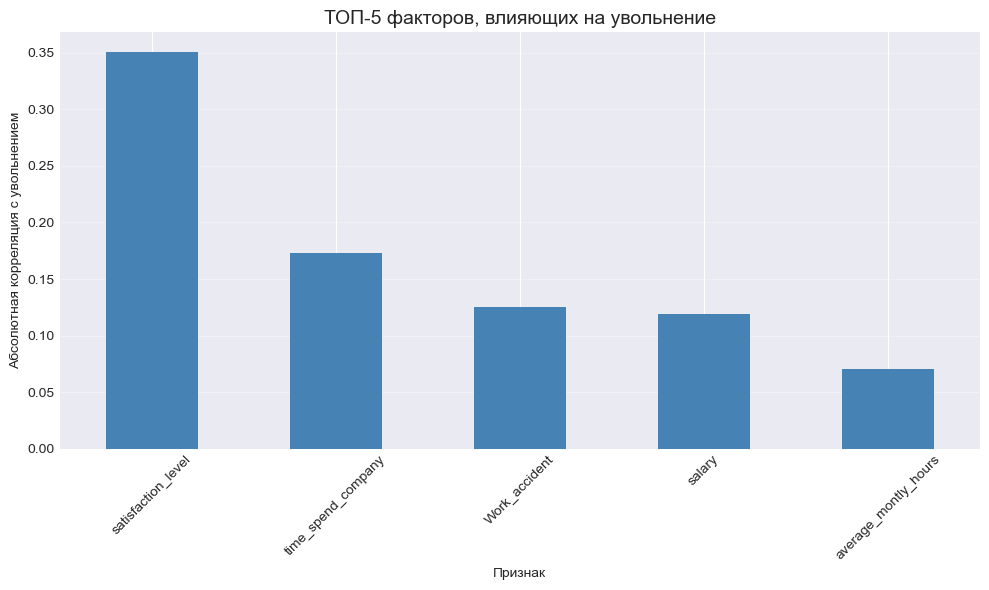

In [27]:
print("ТОП-5 факторов, наиболее связанных с увольнением:")

df_corr = df.copy()

if 'department' in df_corr.columns:
    df_corr['department'] = pd.factorize(df_corr['department'])[0]
if 'salary' in df_corr.columns:
    salary_map = {'low': 0, 'medium': 1, 'high': 2}
    df_corr['salary'] = df_corr['salary'].map(salary_map)

correlation_matrix = df_corr.corr()
correlation_with_left = correlation_matrix['left'].sort_values(ascending=False)

top_factors = correlation_with_left.drop('left').abs().sort_values(ascending=False).head(5)
print(top_factors)

plt.figure(figsize=(10, 6))
top_factors.plot(kind='bar', color='steelblue')
plt.title('ТОП-5 факторов, влияющих на увольнение', fontsize=14)
plt.ylabel('Абсолютная корреляция с увольнением')
plt.xlabel('Признак')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

14. Группировка по времени работы в компании

Анализ увольнений по времени работы в компании:


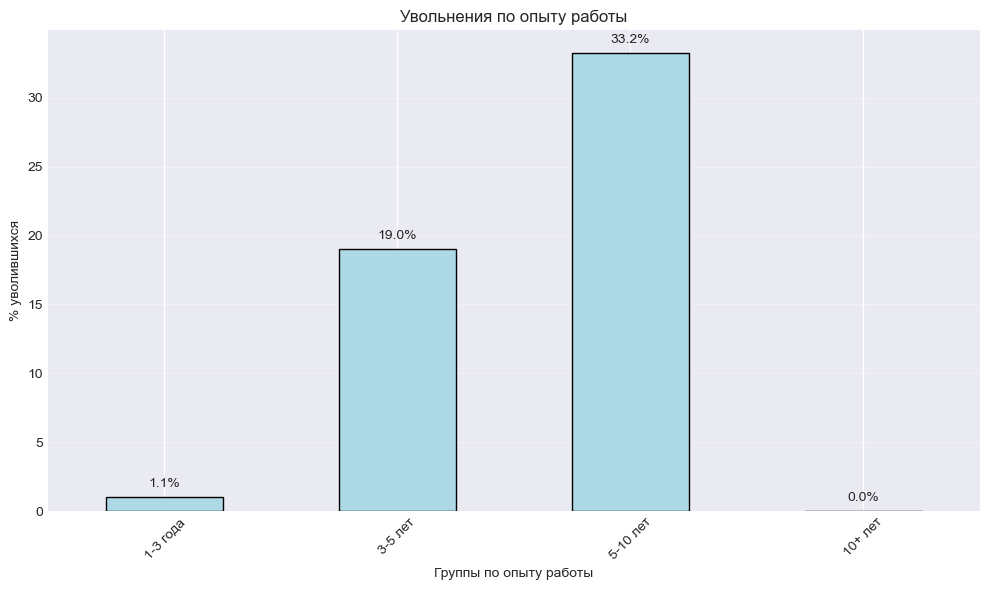


Результаты:
1-3 года: 1.1% увольнений (2910 чел.)
3-5 лет: 19.0% увольнений (7195 чел.)
5-10 лет: 33.2% увольнений (1779 чел.)
10+ лет: 0.0% увольнений (107 чел.)


In [37]:
print("Анализ увольнений по времени работы в компании:")

if 'time_spend_company' in df.columns:
    time_col = 'time_spend_company'
elif 'time_spend' in df.columns:
    time_col = 'time_spend'
else:
    time_cols = [col for col in df.columns if 'time' in col.lower()]
    if time_cols:
        time_col = time_cols[0]
        print(f"Используем столбец: {time_col}")
    else:
        time_col = None

if time_col:
    df['experience_group'] = 'Другое'
    
    df.loc[df[time_col] < 1, 'experience_group'] = 'Меньше года'
    df.loc[(df[time_col] >= 1) & (df[time_col] < 3), 'experience_group'] = '1-3 года'
    df.loc[(df[time_col] >= 3) & (df[time_col] < 5), 'experience_group'] = '3-5 лет'
    df.loc[(df[time_col] >= 5) & (df[time_col] < 10), 'experience_group'] = '5-10 лет'
    df.loc[df[time_col] >= 10, 'experience_group'] = '10+ лет'
    
    turnover = df.groupby('experience_group')['left'].mean() * 100
    
    order = ['Меньше года', '1-3 года', '3-5 лет', '5-10 лет', '10+ лет', 'Другое']
    turnover = turnover.reindex([g for g in order if g in turnover.index])
    
    plt.figure(figsize=(10, 6))
    turnover.plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title('Увольнения по опыту работы')
    plt.xlabel('Группы по опыту работы')
    plt.ylabel('% уволившихся')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    for i, v in enumerate(turnover.values):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("\nРезультаты:")
    for group, rate in turnover.items():
        count = len(df[df['experience_group'] == group])
        print(f"{group}: {rate:.1f}% увольнений ({count} чел.)")
        
else:
    print("Не найден столбец с временем работы.")

15. Анализ выгорания сотрудников

Анализ потенциального выгорания сотрудников:
Среди сотрудников с признаками выгорания уволились: 71.0%
Среди остальных сотрудников уволились: 13.5%


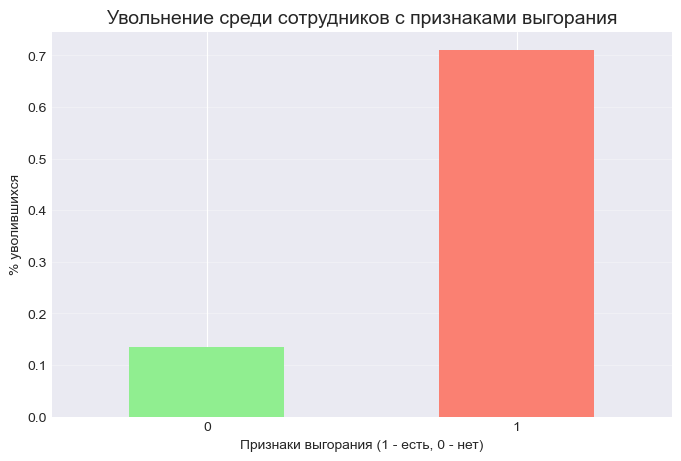

In [30]:
print("Анализ потенциального выгорания сотрудников:")

required_cols = ['average_montly_hours', 'satisfaction_level', 'time_spend_company']
available_cols = [col for col in required_cols if col in df.columns]

if len(available_cols) == 3:
    df['potential_burnout'] = ((df['average_montly_hours'] > 250) & 
                               (df['satisfaction_level'] < 0.5) & 
                               (df['time_spend_company'] > 3)).astype(int)

    burnout_stats = df.groupby('potential_burnout')['left'].mean()
    print(f"Среди сотрудников с признаками выгорания уволились: {burnout_stats.get(1, 0)*100:.1f}%")
    print(f"Среди остальных сотрудников уволились: {burnout_stats.get(0, 0)*100:.1f}%")

    plt.figure(figsize=(8, 5))
    burnout_stats.plot(kind='bar', color=['lightgreen', 'salmon'])
    plt.title('Увольнение среди сотрудников с признаками выгорания', fontsize=14)
    plt.xlabel('Признаки выгорания (1 - есть, 0 - нет)')
    plt.ylabel('% уволившихся')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.show()
else:
    print(f"Не все нужные столбцы доступны. Найдены: {available_cols}")

16. Подготовка данных для моделирования

In [31]:
print("Подготовка данных для моделирования:")

df_model = df.copy()

cols_to_drop = ['time_spend_group', 'potential_burnout']
for col in cols_to_drop:
    if col in df_model.columns:
        df_model = df_model.drop(col, axis=1)

df_model = pd.get_dummies(df_model, columns=['department', 'salary'], drop_first=True, dtype=int)

X = df_model.drop('left', axis=1)
y = df_model['left']

print(f"Признаков: {X.shape[1]}")
print(f"Примеры признаков: {X.columns.tolist()[:10]}...")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Баланс классов в обучающей: {y_train.mean():.3f}")
print(f"Баланс классов в тестовой: {y_test.mean():.3f}")

Подготовка данных для моделирования:
Признаков: 18
Примеры признаков: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department_RandD', 'department_accounting', 'department_hr']...
Размер обучающей выборки: (9592, 18)
Размер тестовой выборки: (2399, 18)
Баланс классов в обучающей: 0.166
Баланс классов в тестовой: 0.166


17. Обучение модели для предсказания увольнений

In [32]:
print("Обучение модели RandomForest для предсказания увольнений:")

try:
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Точность модели: {accuracy:.4f}")
    print("\nОтчет по классификации:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    print("Матрица ошибок:")
    print(cm)
    
except Exception as e:
    print(f"Ошибка при обучении модели: {e}")
    print("Пропускаем этот пункт...")

Обучение модели RandomForest для предсказания увольнений:
Точность модели: 0.9850

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.92      0.95       398

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.98      0.98      2399

Матрица ошибок:
[[1996    5]
 [  31  367]]


18. Важность признаков по мнению модели

Важность признаков для предсказания увольнения:


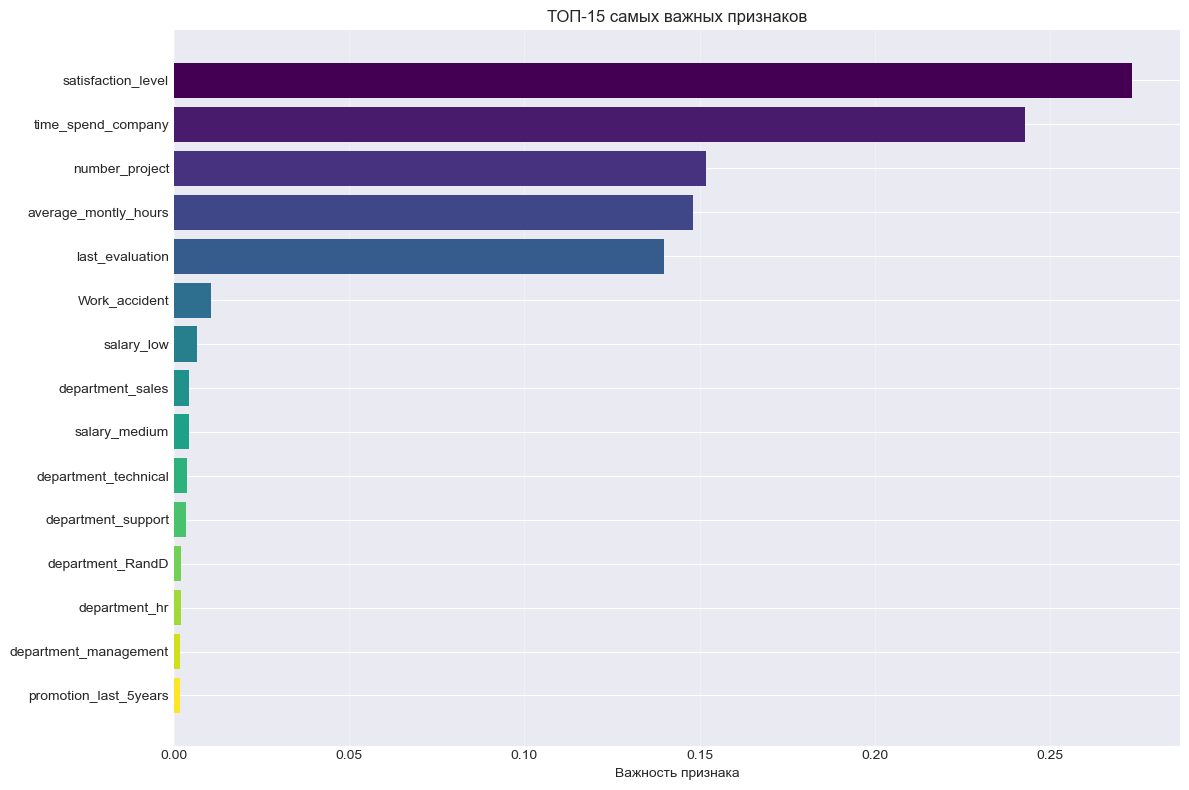


ТОП-10 самых важных признаков:
             Признак  Важность
  satisfaction_level  0.273453
  time_spend_company  0.242878
      number_project  0.151746
average_montly_hours  0.147993
     last_evaluation  0.139829
       Work_accident  0.010560
          salary_low  0.006584
    department_sales  0.004164
       salary_medium  0.004154
department_technical  0.003836


In [38]:
print("Важность признаков для предсказания увольнения:")

try:
    feature_importance = pd.DataFrame({
        'Признак': X.columns,
        'Важность': model.feature_importances_
    }).sort_values('Важность', ascending=False)
    
    top_15 = feature_importance.head(15)
    
    plt.figure(figsize=(12, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_15)))
    plt.barh(top_15['Признак'], top_15['Важность'], color=colors)
    plt.xlabel('Важность признака')
    plt.title('ТОП-15 самых важных признаков')
    plt.gca().invert_yaxis() 
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nТОП-10 самых важных признаков:")
    print(feature_importance.head(10).to_string(index=False))
    
except Exception as e:
    print(f"Ошибка: {e}")
    
    print("\nИспользуем корреляционный анализ...")
    
    numeric_df = df.select_dtypes(include=[np.number])
    if 'left' in numeric_df.columns:
        correlations = numeric_df.corr()['left'].abs().sort_values(ascending=False)
        correlations = correlations.drop('left', errors='ignore')
        
        print("ТОП-10 по корреляции:")
        print(correlations.head(10).round(4))
        
        plt.figure(figsize=(10, 6))
        correlations.head(15).plot(kind='barh', color='lightblue')
        plt.title('Признаки по корреляции с увольнением')
        plt.xlabel('Абсолютная корреляция')
        plt.tight_layout()
        plt.show()

19. Выводы и рекомендации

In [34]:
print("=" * 80)
print("ВЫВОДЫ И РЕКОМЕНДАЦИИ ПО СНИЖЕНИЮ ТЕКУЧЕСТИ КАДРОВ")
print("=" * 80)

print("\n1. КЛЮЧЕВЫЕ ФАКТОРЫ УВОЛЬНЕНИЯ:")
print("-" * 40)

# уровень удовлетворенности
if 'satisfaction_level' in df.columns:
    sat_left = df[df['left']==1]['satisfaction_level'].mean()
    sat_stay = df[df['left']==0]['satisfaction_level'].mean()
    print(f"1.1. Уровень удовлетворенности:")
    print(f"    • Средний уровень у уволившихся: {sat_left:.3f}")
    print(f"    • Средний уровень у оставшихся: {sat_stay:.3f}")
    print(f"    • Разница: {sat_left - sat_stay:.3f}")

# нагрузка
if 'average_montly_hours' in df.columns:
    hours_left = df[df['left']==1]['average_montly_hours'].mean()
    hours_stay = df[df['left']==0]['average_montly_hours'].mean()
    print(f"\n1.2. Рабочая нагрузка:")
    print(f"    • Средняя нагрузка у уволившихся: {hours_left:.0f} часов/месяц")
    print(f"    • Средняя нагрузка у оставшихся: {hours_stay:.0f} часов/месяц")
    print(f"    • Разница: {hours_left - hours_stay:.0f} часов")

# карьерный рост
if 'promotion_last_5years' in df.columns:
    promo_left = df[df['left']==1]['promotion_last_5years'].mean()*100
    promo_stay = df[df['left']==0]['promotion_last_5years'].mean()*100
    print(f"\n1.3. Карьерный рост:")
    print(f"    • Уволившиеся с повышением: {promo_left:.1f}%")
    print(f"    • Оставшиеся с повышением: {promo_stay:.1f}%")

print("\n2. РЕКОМЕНДАЦИИ:")
print("-" * 40)
print("2.1. Улучшение удовлетворенности:")
print("    • Внедрить регулярные опросы удовлетворенности")
print("    • Создать систему обратной связи")
print("    • Внедрить программы мотивации")

print("\n2.2. Контроль нагрузки:")
print("    • Установить лимиты рабочих часов")
print("    • Внедрить гибкий график работы")
print("    • Мониторить признаки выгорания")

print("\n2.3. Развитие карьеры:")
print("    • Создать прозрачную систему повышений")
print("    • Разработать программы обучения")
print("    • Внедрить наставничество")

print("\n2.4. Адаптация новых сотрудников:")
print("    • Усилить программы адаптации")
print("    • Назначить менторов новичкам")
print("    • Регулярные check-in встречи")

ВЫВОДЫ И РЕКОМЕНДАЦИИ ПО СНИЖЕНИЮ ТЕКУЧЕСТИ КАДРОВ

1. КЛЮЧЕВЫЕ ФАКТОРЫ УВОЛЬНЕНИЯ:
----------------------------------------
1.1. Уровень удовлетворенности:
    • Средний уровень у уволившихся: 0.440
    • Средний уровень у оставшихся: 0.667
    • Разница: -0.227

1.2. Рабочая нагрузка:
    • Средняя нагрузка у уволившихся: 208 часов/месяц
    • Средняя нагрузка у оставшихся: 199 часов/месяц
    • Разница: 9 часов

1.3. Карьерный рост:
    • Уволившиеся с повышением: 0.4%
    • Оставшиеся с повышением: 1.9%

2. РЕКОМЕНДАЦИИ:
----------------------------------------
2.1. Улучшение удовлетворенности:
    • Внедрить регулярные опросы удовлетворенности
    • Создать систему обратной связи
    • Внедрить программы мотивации

2.2. Контроль нагрузки:
    • Установить лимиты рабочих часов
    • Внедрить гибкий график работы
    • Мониторить признаки выгорания

2.3. Развитие карьеры:
    • Создать прозрачную систему повышений
    • Разработать программы обучения
    • Внедрить наставничество

2

20. Сохранение результатов анализа

In [35]:
print("Сохранение результатов анализа...")

key_metrics_data = []

if 'left' in df.columns:
    key_metrics_data.append(['Общее количество сотрудников', len(df)])
    key_metrics_data.append(['Количество уволившихся', df['left'].sum()])
    key_metrics_data.append(['Процент текучести', f"{df['left'].mean()*100:.2f}%"])

if 'satisfaction_level' in df.columns:
    key_metrics_data.append(['Средняя удовлетворенность уволившихся', 
                            f"{df[df['left']==1]['satisfaction_level'].mean():.3f}"])

if 'average_montly_hours' in df.columns:
    key_metrics_data.append(['Средняя нагрузка уволившихся (часы/месяц)', 
                            f"{df[df['left']==1]['average_montly_hours'].mean():.0f}"])

try:
    key_metrics_data.append(['Точность модели предсказания', f"{accuracy:.4f}"])
except:
    pass

key_metrics = pd.DataFrame(key_metrics_data, columns=['Метрика', 'Значение'])

print("\nКлючевые метрики анализа:")
print(key_metrics.to_string(index=False))

try:
    key_metrics.to_csv('employee_analysis_results.csv', index=False, encoding='utf-8-sig')
    print("\nРезультаты сохранены в файл: employee_analysis_results.csv")
except Exception as e:
    print(f"\nОшибка при сохранении: {e}")

print("\n" + "="*50)
print("АНАЛИЗ ЗАВЕРШЕН УСПЕШНО!")
print("="*50)

Сохранение результатов анализа...

Ключевые метрики анализа:
                                  Метрика Значение
             Общее количество сотрудников    11991
                   Количество уволившихся     1991
                        Процент текучести   16.60%
    Средняя удовлетворенность уволившихся    0.440
Средняя нагрузка уволившихся (часы/месяц)      208
             Точность модели предсказания   0.9850

Результаты сохранены в файл: employee_analysis_results.csv

АНАЛИЗ ЗАВЕРШЕН УСПЕШНО!
